                                              Статический анализ данных

Цель:Провести иследование на основе полученых данных.В ходе иследования отточить навыки работы с графиками и проверкой гипотез.

План работы:
1.Загрузить данные
2.Предобработка данных
3.Исследовательский анализ данных
4.Объединение данных
5.Подсчёт выручки
6.Проверка гипотез
7.Распределения

В основных данных есть информация о пользователях, их поездках и подписках.

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
from scipy.stats import ttest_ind
from scipy import stats as st
from math import sqrt
from scipy.stats import binom, norm

#### Шаг 1. Загрузка данных

In [3]:
users=pd.read_csv('/datasets/users_go.csv')
riders=pd.read_csv('/datasets/rides_go.csv')
subscriptions=pd.read_csv('/datasets/subscriptions_go.csv')

In [4]:
#изучил полученные данные
users.info()
riders.info()#в столбце date не верный тип данных
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Col

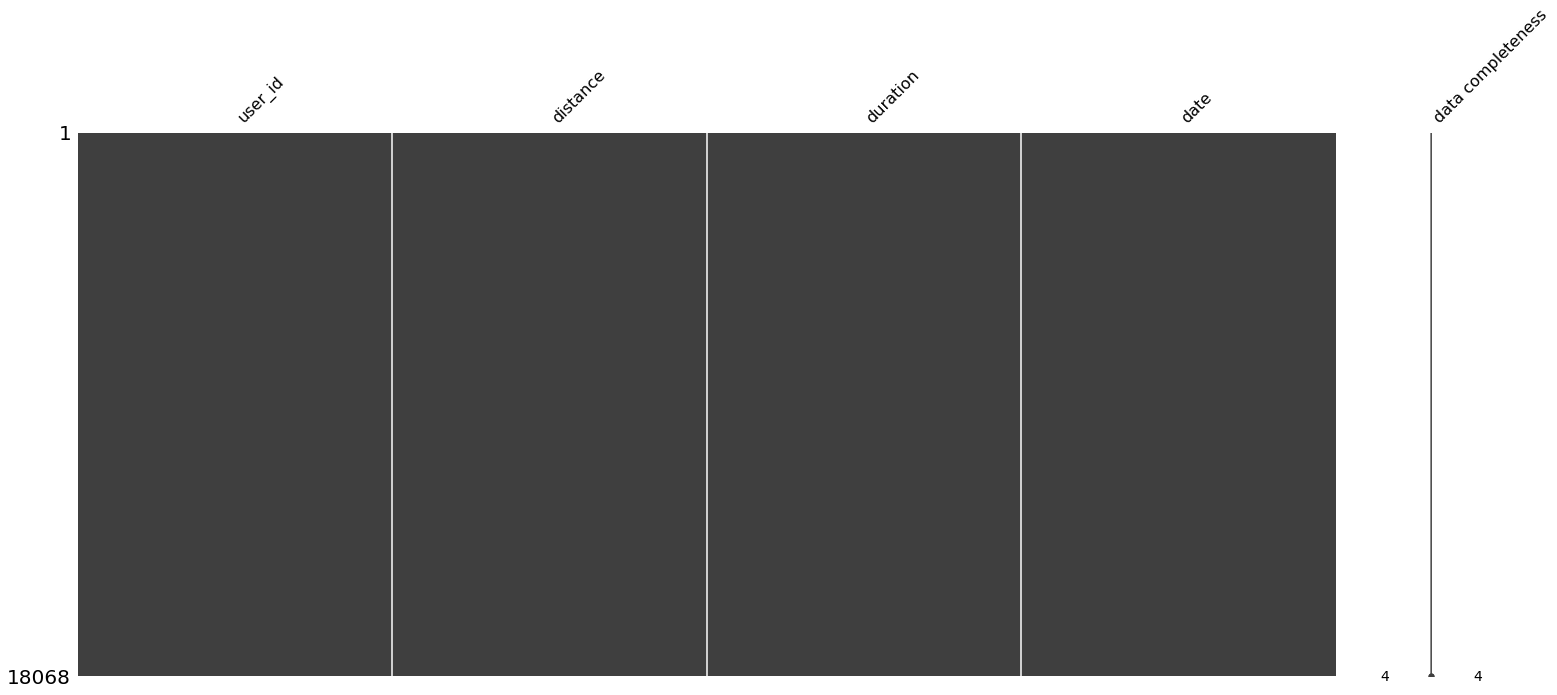

user_id 0
distance 0
duration 0
date 0


In [5]:
msno.matrix(riders,labels=True)#график отображающий пропуски в df riders
plt.show()
for column in riders.columns:
    print(column,riders[column].isna().sum())

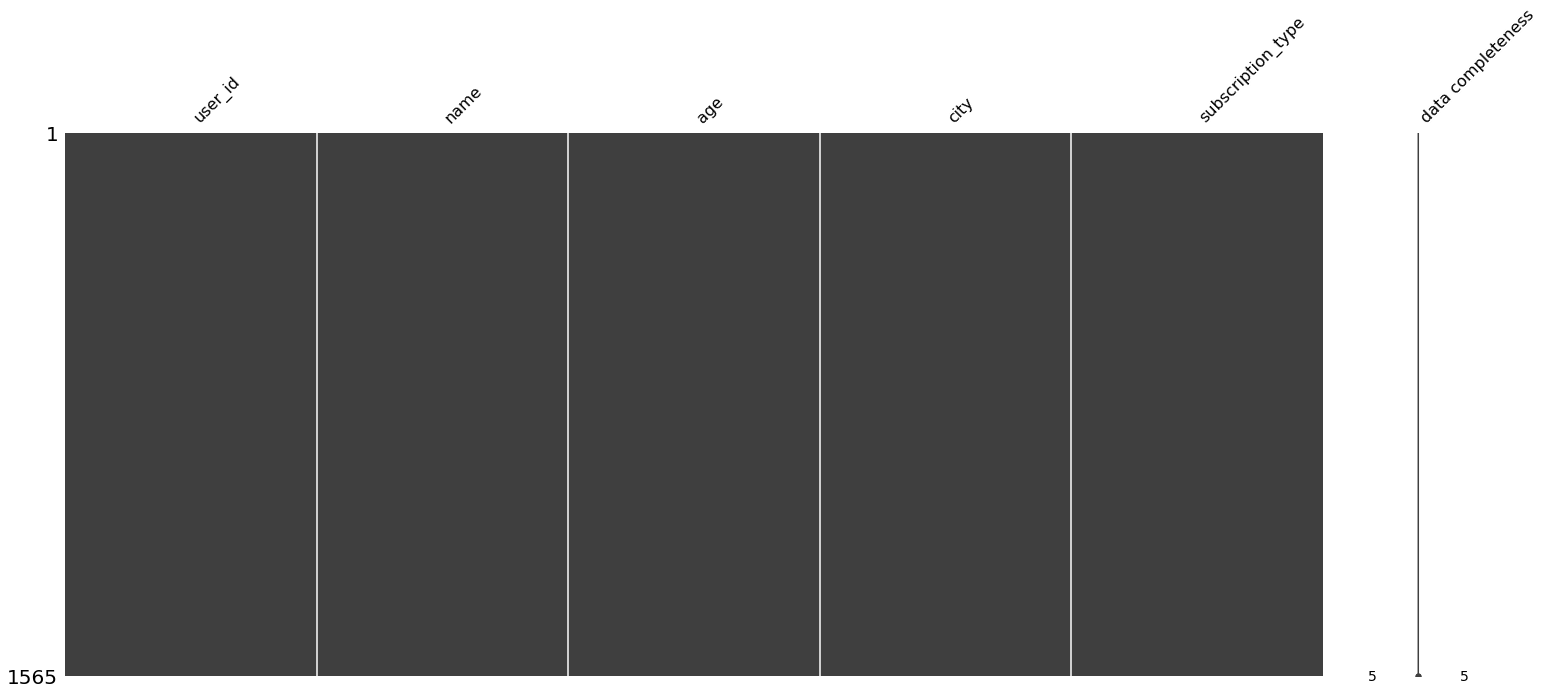

user_id 0
name 0
age 0
city 0
subscription_type 0


In [6]:
msno.matrix(users,labels=True)#график отображающий пропуски в df users
plt.show()
for column in users.columns:
    print(column,users[column].isna().sum())

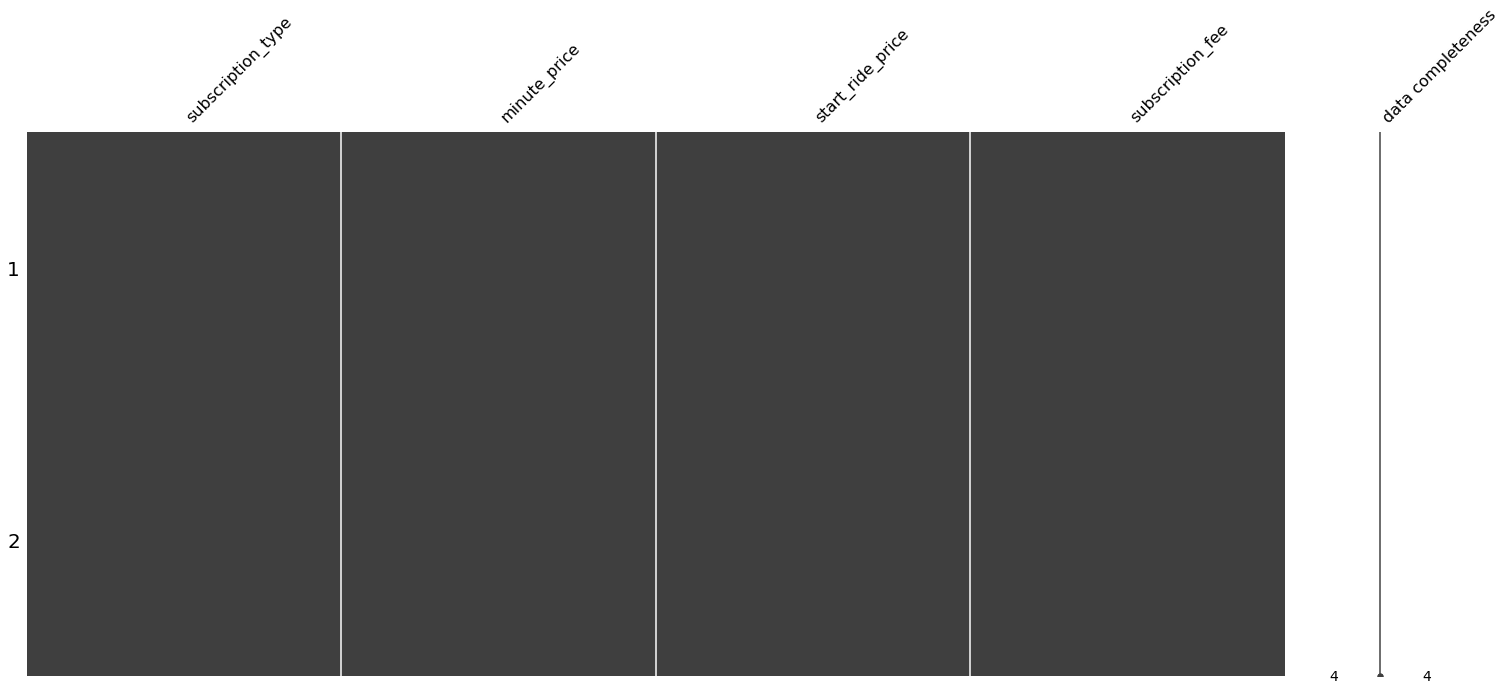

subscription_type 0
minute_price 0
start_ride_price 0
subscription_fee 0


In [7]:
msno.matrix(subscriptions,labels=True)#график отображающий пропуски в df subscriptions
plt.show()
for column in subscriptions.columns:
    print(column,subscriptions[column].isna().sum())

С помощью графиков и циклов проверил целостность данных.Пропуски не были обнаружены.

In [8]:
users.user_id.value_counts()#нашел дубликаты в таблице users в столбце user_id
users.city.unique()#проверил на наличие неявных дубликатов 
users.name.unique()#проверил на наличие неявных дубликатов 

array(['Кира', 'Станислав', 'Алексей', 'Константин', 'Адель', 'Регина',
       'Игорь', 'Юрий', 'Ян', 'Валерий', 'Агата', 'Марк', 'Ева',
       'Антонина', 'Валерия', 'Амалия', 'Даниил', 'Аделина', 'Святогор',
       'Борис', 'Вероника', 'Ростислав', 'Назар', 'Эдуард', 'Василий',
       'Денис', 'Тамара', 'Николай', 'Эвелина', 'Федор', 'Руслан', 'Иван',
       'Любовь', 'Ярослава', 'Майя', 'Ильдар', 'Данила', 'Нина',
       'Стефания', 'Ясмина', 'Дмитрий', 'Александр', 'Одиссей', 'Арсений',
       'Алла', 'Таисия', 'Максим', 'Юлиана', 'Павел', 'Карина', 'Алиса',
       'Лидия', 'Рамиль', 'Родион', 'Ника', 'Оксана', 'Анастасия',
       'Маргарита', 'Вера', 'Тимур', 'Никита', 'Лев', 'Влад', 'Артур',
       'Анна', 'Ольга', 'Вячеслав', 'Ксения', 'Виталина', 'Владислав',
       'Тамерлан', 'Амина', 'Вадим', 'Олеся', 'Зарина', 'Егор', 'Гордей',
       'Лилия', 'Святослав', 'Роберт', 'Амир', 'Влада', 'Богдан',
       'Полина', 'Марат', 'Елисей', 'Макар', 'Алина', 'Глеб', 'Андрей',
       'Ал

Нашел дубликаты в столбце user_id таблицы users,тк данные в этом столбце должны быть уникальны от дубликатов надо избавиться.Неявные дубликаты могли встретится только в столбцах city и name из таблицы users(я пришел к такому выводу, тк в остальных столбцах данные могут дублироваться), при проверки они не были найдены.

#### Шаг 2. Предобработка данных

In [9]:
#добавил столбец с месяцами
riders.date=pd.to_datetime(riders.date)
riders.date.dt.strftime('%Y').unique()#проверил за сколько лет представленны данные
riders['month']=riders.date.dt.strftime('%B')
riders['duration'] = np.ceil(riders['duration'])#округлил значения по заданию
riders.head()

,user_id,distance,duration,date,month
0,1,4409.919140,26.0,2021-01-01,January
1,1,2617.592153,16.0,2021-01-18,January
2,1,754.159807,7.0,2021-04-20,April
3,1,2694.783254,19.0,2021-08-11,August
4,1,4028.687306,27.0,2021-08-28,August


In [10]:
users = users.drop_duplicates(subset=['user_id'])#удалил дубликаты в user_id так как данные в этом столбце должны быть уникальны
users.user_id.value_counts()

1       1
1020    1
1029    1
1028    1
1027    1
       ..
510     1
509     1
508     1
507     1
1534    1
Name: user_id, Length: 1534, dtype: int64

Удалил дубликаты из столбца user_id таблицы users,тк данные в этом столбце должны быть уникальны

#### Шаг 3. Исследовательский анализ данных

In [11]:
def plotbar(df,ind,val,func,name,x,y): #написал функцию чтобы не повторялся код
    data=df.pivot_table(index=ind,values=val,aggfunc=func)
    data.plot.bar()
    plt.title(name)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

    
def plotbar_sort(df,ind,val,func,name,x,y): #написал функцию чтобы не повторялся код
    data=df.pivot_table(index=ind,values=val,aggfunc=func).sort_values(by=val,ascending=True)
    data.plot.bar()
    plt.title(name)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

    
def plotscatter(df,ind,val,func,name,alpha,x,y): #написал функцию чтобы не повторялся код
    data=df.pivot_table(index=ind,values=val,aggfunc=func)
    plt.scatter(data.index, data[val],label=name,alpha=alpha)
    plt.title(name)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

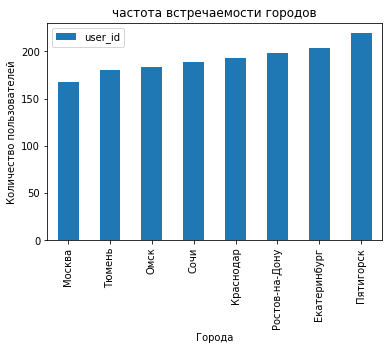

In [12]:
plotbar_sort(users,'city','user_id','count','частота встречаемости городов','Города','Количество пользователей')

Графики показали, что чаше всего люди пользуются приложением Пятигорске и реже всего в Москве.

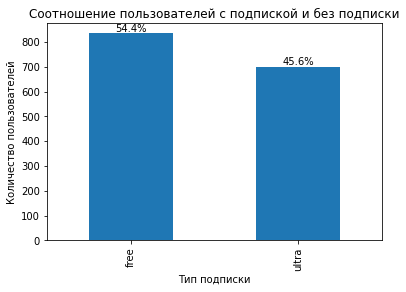

In [13]:
sub_perc = users['subscription_type'].value_counts(normalize=True)['ultra']
no_sub_perc = users['subscription_type'].value_counts(normalize=True)['free']
sub_and_no_sub_data = users.subscription_type.value_counts().to_frame()

sub_and_no_sub_data.plot.bar(legend=False)
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.xlabel('Тип подписки')
plt.ylabel('Количество пользователей')

for idx, value in enumerate(sub_and_no_sub_data['subscription_type']):
    plt.annotate(f'{value / len(users):.1%}', xy=(idx, value), ha='center', va='bottom')

plt.show()

Графики показали, что людей без подписки больше, а если точнее, то в соотношении от общего количества пользователей людей с подпиской-45.6%, а людей без подписки-54.4%.

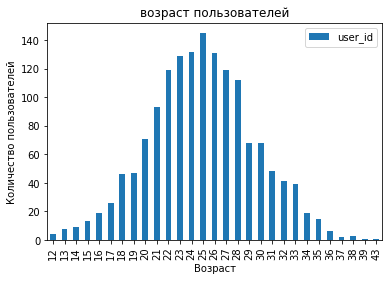

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [14]:
plotbar(users,'age','user_id','count','возраст пользователей','Возраст','Количество пользователей')
users.age.describe()

С помощью графика нашел возраст целевой аудитории сервиса(от 22 до 28 лет), так же подкрепил эти данные таблицой с возрастами, и тем, как часто они встречаются(таблица отсортирована по убыванию). 

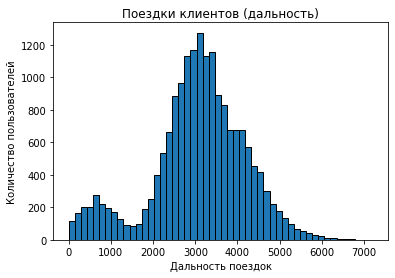

In [15]:
riders['distance'].plot.hist(bins=50, edgecolor='black')
plt.title('Поездки клиентов (дальность)')
plt.xlabel('Дальность поездок')
plt.ylabel('Количество пользователей')
plt.show()

Большая часть людей ездит от 2000 до 5000 метров.

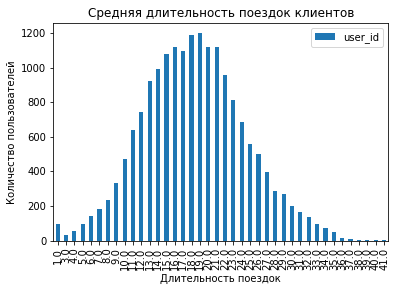

In [16]:
plotbar(riders,'duration','user_id','count','Средняя длительность поездок клиентов','Длительность поездок','Количество пользователей')

Большая часть людей ездит от 10 до 27 минут.

#### Шаг 4. Объединение данных

In [17]:
df = users.merge(right=riders,on='user_id')
data=df.merge(right=subscriptions,on='subscription_type')#обьеденил все таблицы в одну
data.tail(30)
#users.shape#5 столбцов
#riders.shape#5 столбцов
#df.shape#9 столбцов (столбец по которому обьединяли данные не в счет поэтому 5+4=9, значит мы правильно обьеденили данные)
#subscriptions.shape#4
#data.shape#12столбцов (столбец по которому обьединяли данные не в счет поэтому 9+3=12, значит мы правильно обьеденили данные)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
18038,1532,Алексей,26,Тюмень,free,3276.676698,19.0,2021-11-19,November,8,50,0
18039,1532,Алексей,26,Тюмень,free,2164.256051,12.0,2021-11-22,November,8,50,0
18040,1532,Алексей,26,Тюмень,free,4551.698449,32.0,2021-12-21,December,8,50,0
18041,1532,Алексей,26,Тюмень,free,1560.191404,10.0,2021-12-28,December,8,50,0
18042,1533,Степан,22,Краснодар,free,3438.600356,21.0,2021-01-07,January,8,50,0
18043,1533,Степан,22,Краснодар,free,310.488247,11.0,2021-02-21,February,8,50,0
18044,1533,Степан,22,Краснодар,free,3508.941165,20.0,2021-03-20,March,8,50,0
18045,1533,Степан,22,Краснодар,free,2965.546552,24.0,2021-03-23,March,8,50,0
18046,1533,Степан,22,Краснодар,free,3848.116660,28.0,2021-03-26,March,8,50,0
18047,1533,Степан,22,Краснодар,free,2500.091900,21.0,2021-03-26,March,8,50,0


In [18]:
#создал отдельные таблицы с данными о людях с подпиской и без нее
sub_data = data.query("subscription_type == 'ultra'")
no_sub_data = data.query("subscription_type == 'free'")
sub_data.head()
no_sub_data.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,15.0,2021-01-02,January,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,17.0,2021-02-01,February,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,21.0,2021-02-04,February,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,10.0,2021-02-10,February,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,18.0,2021-02-14,February,8,50,0


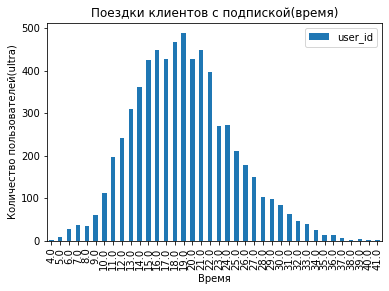

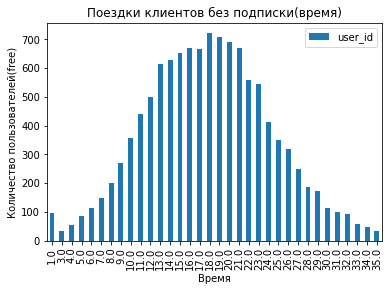

In [19]:
plotbar(sub_data,'duration','user_id','count','Поездки клиентов c подпиской(время)','Время','Количество пользователей(ultra)')
plotbar(no_sub_data,'duration','user_id','count','Поездки клиентов без подписки(время)','Время','Количество пользователей(free)')

Графики показали, что в среднем люди без подписки дольше.

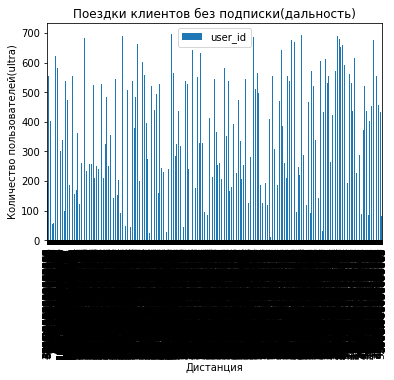

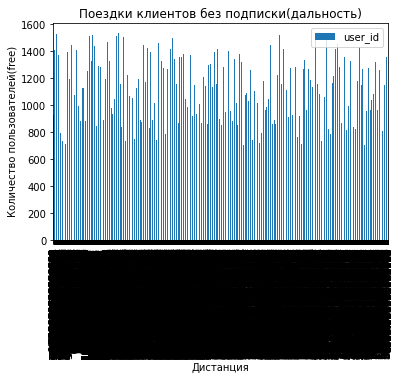

In [20]:
plotbar(sub_data,'distance','user_id','median','Поездки клиентов без подписки(дальность)','Дистанция','Количество пользователей(ultra)')
plotbar(no_sub_data,'distance','user_id','median','Поездки клиентов без подписки(дальность)','Дистанция','Количество пользователей(free)')

Графики показали, что в среднем люди без подписки ездят дальше.P.s как вы и просили я сделал графики такого же типа, но они долго стоятся и снизу какой то черное пятно

#### Шаг 5. Подсчёт выручки

In [21]:
users_data_per_month = data.pivot_table(index=['user_id','month'], values=['duration', 'distance', 'name','subscription_type'], aggfunc={'duration': 'sum', 'distance': 'sum', 'name': 'count','subscription_type': 'first'})
users_data_per_month.rename(columns={"name": "rides_total"},inplace=True)
users_data_per_month.tail()#создал датафрейм с с помесечной статистикой каждого пользователя, так же добавил поле с типом подписки для дальнейшего расчета прибыли с клиента

distance  duration  rides_total subscription_type
user_id month                                                           
1534    February    2103.914120      14.0            1              free
        January     4678.415899      16.0            1              free
        June        3409.468534      26.0            2              free
        November   13350.015305      78.0            4              free
        September   4928.173852      23.0            1              free

In [22]:
def revenue(row):
    if row['subscription_type'] == 'free':
        return row['rides_total'] * 50 + row['duration'] * 8
    elif row['subscription_type'] == 'ultra':
        return row['duration'] * 6 + 199
    else:
        return 0 
        

users_data_per_month['revenue'] = users_data_per_month.apply(revenue, axis=1)
users_data_per_month.head()

distance  duration  rides_total subscription_type  \
user_id month                                                            
1       April      754.159807       7.0            1             ultra   
        August    6723.470560      46.0            2             ultra   
        December  6751.629942      28.0            2             ultra   
        January   7027.511294      42.0            2             ultra   
        November  7003.499363      56.0            3             ultra   

                  revenue  
user_id month              
1       April       241.0  
        August      475.0  
        December    367.0  
        January     451.0  
        November    535.0

#### Шаг 6. Проверка гипотез

In [23]:
#Нулевая гипотеза длительность поездок пользователей с подпиской равна или меньше длительности поездки пользователей без подписки.
#Альтернативная гипотеза длительность поездки пользователей с подпиской статистически значимо больше длительности поездки пользователей без подписки.
sub_data.duration.sum()#126946.0
no_sub_data.duration.sum()#209652.0

ultra_sub = sub_data ['duration'] 
free_sub = no_sub_data['duration']

t_statistic, p_value = ttest_ind(ultra_sub, free_sub, alternative='greater')

print("T-статистика:", t_statistic)
print("P-значение:", p_value / 2)

alpha = 0.05
if p_value / 2 < alpha:
    print("Отвергаем нулевую гипотезу: существует статистическое различие во времени, время с подпиской больше.")
else:
    print("Не удалось отвергнуть нулевую гипотезу: различие во времени статистически незначимо, или время с подпиской не превышает время без подписки.")

T-статистика: 12.186464491247767
P-значение: 1.2479726860368313e-34
Отвергаем нулевую гипотезу: существует статистическое различие во времени, время с подпиской больше.


In [24]:
# решение ревьюера
ultra_sub = sub_data ['duration'] 
free_sub = no_sub_data['duration']
results = st.ttest_ind(ultra_sub, free_sub, alternative = 'greater')                   
alpha = 0.05                      
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

2.4959453720736625e-34
Отвергаем нулевую гипотезу


Как и показывали графики до этого люди без подписки ездят дольше

In [25]:
#Нулевая гипотеза  среднее расстояние, пройденное пользователями с подпиской равно оптимальному значению.
#Альтернативная гипотеза среднее расстояние, пройденное пользователями с подпиской отличается от оптимального значения.
distance_sub=users_data_per_month.query("subscription_type == 'ultra'").groupby('user_id')['distance'].mean()

interested_value = 3130

alpha = 0.05 

results = st.ttest_1samp(distance_sub, interested_value)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Люди в среднем ездят больше оптимального для самокатов растояния')
else:
    print('Люди в среднем проезжают оптимальное растояние для самокатов')

p-значение: 2.513258196753858e-153
Люди в среднем ездят больше оптимального для самокатов растояния


Растояние которое люди с подпиской проезжают больше чем оптимальное для самокатов

In [26]:
#Нулевая гипотеза  выручка от пользователей с подпиской равна или меньше средней выручки от пользователей без подписки.
#Альтернативная гипотеза выручка от пользователей с подпиской статистически значимо больше средней выручки от пользователей без подписки.
revenue_per_month_sub=users_data_per_month.query("subscription_type == 'ultra'").groupby('month')['revenue'].sum()
revenue_per_month_no_sub=users_data_per_month.query("subscription_type == 'free'").groupby('month')['revenue'].sum()

revenue_sub = revenue_per_month_sub.values
revenue_no_sub = revenue_per_month_no_sub.values

t_statistic, p_value = ttest_ind(revenue_sub, revenue_no_sub, alternative='greater')

print("T-статистика:", t_statistic)
print("P-значение:", p_value / 2)  # Делим p-значение на 2, так как это односторонний тест

alpha = 0.05
if p_value / 2 < alpha:
    print("Отвергаем нулевую гипотезу: существует статистическое различие в выручке, выручка с подпиской больше.")
else:
    print("Не удалось отвергнуть нулевую гипотезу: различие в выручке статистически незначимо, или выручка с подпиской не превышает выручку без подписки.")

T-статистика: -15.017821600580438
P-значение: 0.4999999999998801
Не удалось отвергнуть нулевую гипотезу: различие в выручке статистически незначимо, или выручка с подпиской не превышает выручку без подписки.


Данные показали, что люди без подписки приносят больше прибыли

#### Шаг 7. Распределения

In [27]:
p = 0.1
q = 0.9
target_probability = 0.05
target_clients = 100

n = 1
while binom.cdf(target_clients - 1, n, p) > target_probability:
    n += 1

print(f"Минимальное количество промокодов n: {n}")

Минимальное количество промокодов n: 1161


/opt/conda/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py:78: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


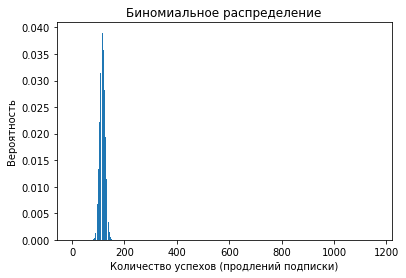

In [28]:
x = np.arange(0, n+1)
y = binom.pmf(x, n, p)

plt.bar(x, y)
plt.title('Биномиальное распределение')
plt.xlabel('Количество успехов (продлений подписки)')
plt.ylabel('Вероятность')
plt.show()

In [29]:
p = 0.4
n = 1000000
probability_less_than_399_5k = binom.cdf(399500, n, p)
print(f"Вероятность открытия не более 399.5 тыс. уведомлений: {probability_less_than_399_5k:.4f}")

Вероятность открытия не более 399.5 тыс. уведомлений: 0.1540


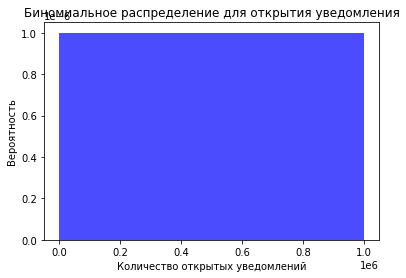

In [30]:
n = 1000000
x = np.arange(0, n+1)
plt.hist(x, bins=100, density=True, color='blue', alpha=0.7)

plt.title('Биномиальное распределение для открытия уведомления')
plt.xlabel('Количество открытых уведомлений')
plt.ylabel('Вероятность')
plt.show()

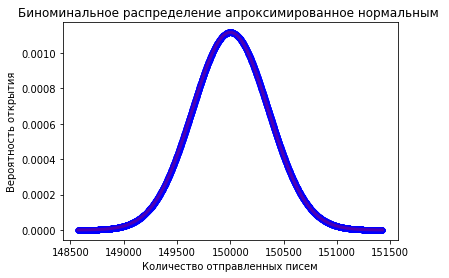

Условие выполняется


In [31]:
def linspace(start, stop, num):
    step = (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step * i)
    return result

n = 1000000
p = 0.15

# границы промежутка, в котором будем строить аппроксимацию -
# от n*p минус 4 ст.отклонения бином.распределения
# до n*p плюс 4 ст.отклонения бином.распределения
# (там, где вероятности значений почти не равны нулю)
left = int(n * p - 4 * sqrt(n * p * (1 - p)))
right = int(n * p + 4 * sqrt(n * p * (1 - p)))
 
# зададим набор значений биномиальной величины на выбранном промежутке:
# все неотрицательные целые числа от left до right
x = list(range(max(0, left), right))
# рисуем график биномиального распределения
ax = plt.subplot()
# используем синие о-образные маркеры и размер маркера 5
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=5)
mu = n * p
sigma = sqrt(n * p * (1 - p))
 
# рисуем график нормального распределения:
# получим список из 100 чисел от left до right
x = linspace(left, right, 100)
# используем красную линию ширины 3 и прозрачности 0.3
ax.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=3, alpha=0.3, label='плотность вероятности нормального распределения')
plt.title('Биноминальное распределение апроксимированное нормальным ')
plt.xlabel('Количество отправленных писем')
plt.ylabel('Вероятность открытия')
plt.show()
# зададим подписи по оси x в пределах ± 3 ст.отклонений от мат.ожидания
# (последний аргумент в методе range - интервал между подписями)
x_ticks = list(range(int(mu - 3 * sigma), int(mu + 3 * sigma), 1))
ax.set_xticks(x_ticks)

# настраиваем оптимальное расположение легенды и выводим график
ax.legend(loc='best')
plt.show()

# выводим, выполняется ли наше условие аппроксимации:
# лежит ли mu ± 3 sigma в промежутке от 0 до n:
if (mu - (3 * sigma) >= 0) and ((mu + (3 * sigma) <= n)):
    print('Условие выполняется')
else:
    print('Условие не выполняется')

# Вывод

<div class="alert alert-info">В ходе исследования данных сервиса аренды самокатов GoFast я провел анализ различных аспектов использования мобильного приложения. Вот основные результаты:

 1.Города и активность:
Проанализировал данные о городах, в которых чаще всего используется приложение.

 2.С подпиской и без неё:
Построил график, демонстрирующий соотношение пользователей с подпиской и без неё. Определил, что большая часть прибыли компании приходит от пользователей без подписки.
    
 3.Целевая аудитория:
Определил возраст целевой аудитории приложения, что может быть полезной информацией для будущих маркетинговых стратегий.
    
 4.Дистанция и продолжительность поездок:
Проанализировал данные о том, как долго и как далеко пользователи ездят на самокатах. Эта информация может помочь оптимизировать предложения и улучшить пользовательский опыт.
    
 5.Продление подписки с использованием промокодов:
Рассчитал, сколько промокодов необходимо раздать, чтобы 10% участников акции продлили подписку с вероятностью примерно 95%. Ответ: 1161 промокод.
    
 6.Открытие уведомлений:
Оценил вероятность того, что не более 399500 уведомлений будут открыты из 1000000 отправленных. Полученный результат составил примерно 15%.
    
Эти выводы могут стать основой для принятия решений в области маркетинга и оптимизации бизнес-процессов.</div>